In [43]:
import geopandas as gpd
%matplotlib inline

import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 6000
pd.options.display.max_colwidth = -1

import os

In [2]:
countries = gpd.read_file('/Users/nathansuberi/Desktop/RW_Data/all_countries/all_countries.shp')

In [55]:
countries.columns

Index(['ADM0_A3', 'abbrev', 'continent', 'formal_nam', 'iso_a2', 'iso_a3',
       'iso_n3', 'iso_short', 'name', 'name_sort', 'postal', 'primary',
       'short_name', 'sov_a3', 'sovereign', 'type', 'un_ar', 'un_en', 'un_es',
       'un_fr', 'un_n3', 'un_region', 'un_ru', 'un_subregi', 'un_zh', 'wb_a2',
       'wb_a3', 'wb_region', 'geometry'],
      dtype='object')

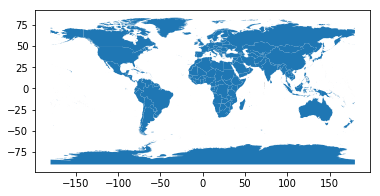

In [6]:
countries.plot()

In [87]:
investments = pd.read_excel('/Users/nathansuberi/Desktop/RW_Data/GlobalChineseOfficialFinanceDataset_v1.0/GlobalChineseOfficialFinanceDataset_v1.0.xlsx')

In [45]:
investments.columns

Index(['project_id', 'recommended_for_research', 'umbrella', 'year', 'donor',
       'funding_agency', 'implementing_agency', 'recipient_condensed', 'title',
       'description', 'status', 'flow', 'flow_class', 'intent', 'amount',
       'currency', 'usd_defl_2014', 'usd_current', 'crs_sector_code',
       'crs_sector_name', 'sources', 'sources_count', 'cofinancing_agency',
       'recipient_agencies', 'recipient_agencies_count', 'deflators_used',
       'exchange_rates_used', 'start_actual', 'start_planned', 'end_actual',
       'end_planned', 'year_uncertain', 'all_recipients', 'recipient_count',
       'recipient_cow_code', 'recipient_oecd_code', 'recipient_oecd_name',
       'recipient_iso3', 'recipient_iso2', 'recipient_un_code',
       'recipient_imf_code', 'recipient_region', 'line_of_credit',
       'is_cofinanced', 'is_ground_truthing', 'loan_type', 'interest_rate',
       'maturity', 'grace_period', 'grant_element', 'location_details',
       'contacts', 'source_triangulatio

In [57]:
china_invest_in = investments['recipient_iso3'].unique()
investment_countries = [cntry for cntry in countries['iso_a3'].unique() if cntry in china_invest_in]

['AFG',
 'AGO',
 'ALB',
 'ARE',
 'ARG',
 'ARM',
 'ATG',
 'AUS',
 'AZE',
 'BDI',
 'BEN',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BWA',
 'CAF',
 'CHL',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COK',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CYP',
 'DJI',
 'DMA',
 'DZA',
 'ECU',
 'EGY',
 'ERI',
 'ETH',
 'FJI',
 'FSM',
 'GAB',
 'GEO',
 'GHA',
 'GIN',
 'GNB',
 'GNQ',
 'GRD',
 'GUY',
 'HTI',
 'IDN',
 'IND',
 'IRN',
 'IRQ',
 'ISR',
 'JAM',
 'JOR',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KWT',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LKA',
 'LSO',
 'MAR',
 'MDA',
 'MDG',
 'MDV',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MNG',
 'MOZ',
 'MRT',
 'MUS',
 'MWI',
 'MYS',
 'NAM',
 'NER',
 'NGA',
 'NIC',
 'NIU',
 'NPL',
 'NRU',
 'NZL',
 'PAK',
 'PER',
 'PHL',
 'PNG',
 'PRK',
 'PSE',
 'ROU',
 'RUS',
 'RWA',
 'SDN',
 'SSD',
 'SEN',
 'SGP',
 'SLE',
 'SOM',
 'SRB',
 'STP',
 'SUR',
 'SYC',
 'SYR',
 'TCD',
 'TGO',
 'THA',
 'TJK',
 'TKM',
 'TLS',
 'TON',
 'TTO',


In [75]:
invest_count = investments.groupby('recipient_iso3').count().sort_values(by='project_id', ascending=False)
invest_count = invest_count.reset_index()[['recipient_iso3','project_id']]
invest_count.columns = ['iso3', 'count']

In [77]:
countries_with_counts = countries.merge(invest_count.reset_index(),
              left_on='iso_a3',
              right_on='iso3')

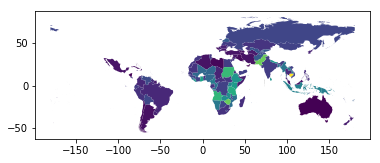

In [79]:
countries_with_counts.plot(column='count')

In [93]:
count_investments = investments.merge(invest_count,
                               left_on='recipient_iso3',
                               right_on='iso3')
print(count_investments.columns)
count_investments = count_investments.sort_values(by=['count','recipient_condensed', 'year'], ascending=False)

Index(['project_id', 'recommended_for_research', 'umbrella', 'year', 'donor',
       'funding_agency', 'implementing_agency', 'recipient_condensed', 'title',
       'description', 'status', 'flow', 'flow_class', 'intent', 'amount',
       'currency', 'usd_defl_2014', 'usd_current', 'crs_sector_code',
       'crs_sector_name', 'sources', 'sources_count', 'cofinancing_agency',
       'recipient_agencies', 'recipient_agencies_count', 'deflators_used',
       'exchange_rates_used', 'start_actual', 'start_planned', 'end_actual',
       'end_planned', 'year_uncertain', 'all_recipients', 'recipient_count',
       'recipient_cow_code', 'recipient_oecd_code', 'recipient_oecd_name',
       'recipient_iso3', 'recipient_iso2', 'recipient_un_code',
       'recipient_imf_code', 'recipient_region', 'line_of_credit',
       'is_cofinanced', 'is_ground_truthing', 'loan_type', 'interest_rate',
       'maturity', 'grace_period', 'grant_element', 'location_details',
       'contacts', 'source_triangulatio

In [97]:
count_investments[['recipient_condensed', 'year', 'title', 'flow', 'usd_current']]#.to_csv('/Users/nathansuberi/Desktop/RW_Data/AidDataAnalysis/ChinaDataSample.csv')

,recipient_condensed,year,title,flow,usd_current
2939,Cambodia,2014,China provides 300 bio-digesters to Cambodian rural households,Grant,400000
2950,Cambodia,2014,China donates 200 ambulances to Cambodia,Grant,
2951,Cambodia,2014,China donates forestry material to Cambodia,Grant,
2954,Cambodia,2014,China provides concessional loan for Cambodian National Road No. 58 Project,Export credits,119751775
2955,Cambodia,2014,China finances Rural Grid Extension Project Phase II in Cambodia (linked to Projects #33071 & #48915),Loan (excluding debt rescheduling),8.0682e+06
2973,Cambodia,2014,Chinese Government Grants 72 Scholarships for AY 2014-2015,Grant,
2981,Cambodia,2014,China Provides Loan for Project of National Road 1577 in Cambodia,Loan (excluding debt rescheduling),36301400
2983,Cambodia,2014,Chinese Language Teaching Volunteers for AY 2014-2015,Free-standing technical assistance,
2823,Cambodia,2013,China and Cambodia sign MOU on Agricultural Cooperation ( link to project ID: #32049),Free-standing technical assistance,
2824,Cambodia,2013,Donation of vegetable pesticide residue detecting instruments ( Link to Project ID: #32048),Grant,30000
